Zomato Data Analysis Project

Cell 1: Import Libraries


In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Cell 2: Upload the CSV File

In [52]:
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

# Load the uploaded file into a DataFrame
file_name = next(iter(uploaded))  # Get the name of the uploaded file
dataframe = pd.read_csv(file_name)
print("CSV file loaded successfully!")
print(dataframe.head())

Saving Zomato_data.csv to Zomato_data.csv
CSV file loaded successfully!
                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


Cell 3: Data Cleaning

In [53]:
# Convert the data type of column -rate
def handleRate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

dataframe['rate'] = dataframe['rate'].apply(handleRate)
print("Data after cleaning 'rate' column:")
print(dataframe.head())

# Check null and missing values
print("\nDataframe Info:")
dataframe.info()

Data after cleaning 'rate' column:
                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  

Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-n

Cell 4: Task 1 - Types of Restaurants

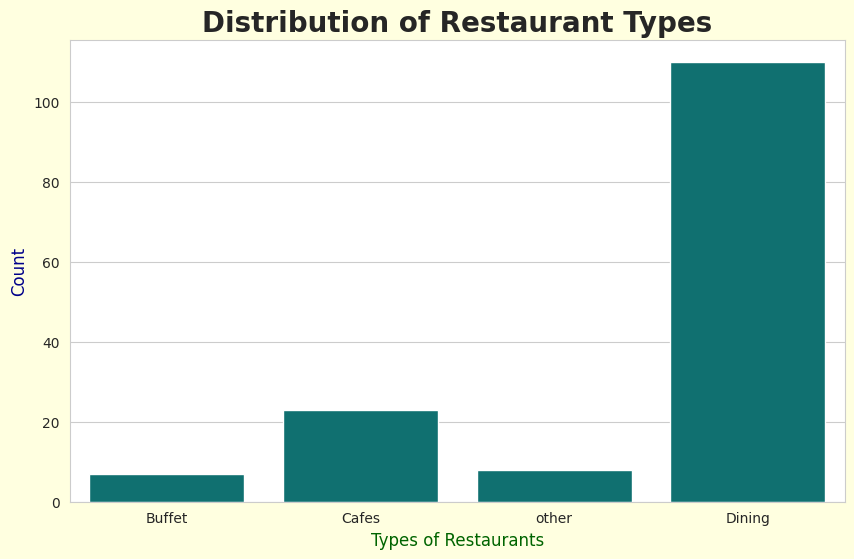

In [54]:
plt.figure(figsize=(10, 6), facecolor="lightyellow")
sns.set_style("whitegrid")
sns.countplot(x=dataframe["listed_in(type)"], color="teal")
plt.xlabel("Types of Restaurants", fontsize=12, color="darkgreen")
plt.ylabel("Count", fontsize=12, color="darkblue")
plt.title("Distribution of Restaurant Types", fontsize=14, fontweight='bold', size=20)
plt.show()

Cell 5: Task 2 - Voting According to Restaurant Type

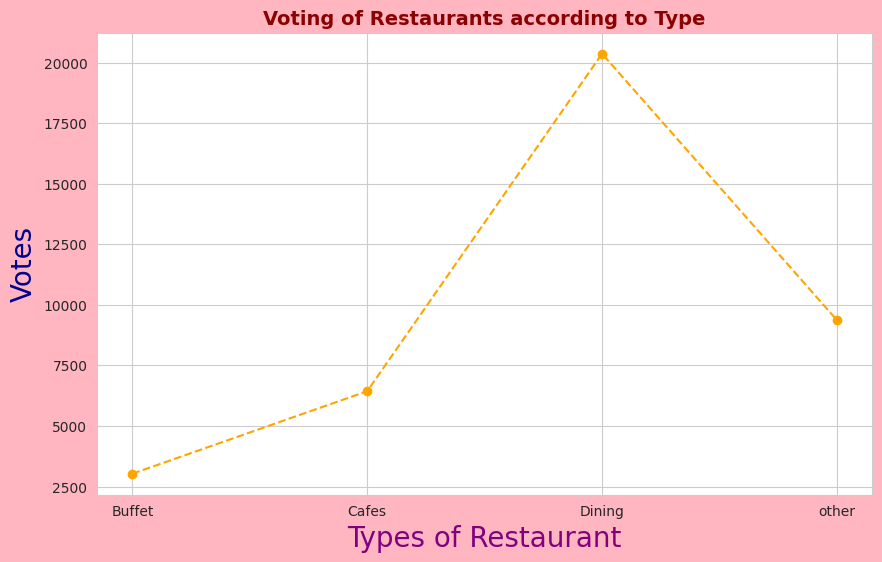

In [55]:
plt.figure(figsize=(10, 6), facecolor="lightpink")
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c='orange', marker='o', linestyle='--')
plt.title("Voting of Restaurants according to Type", fontweight="bold", fontsize=14, color="darkred")
plt.xlabel("Types of Restaurant", c="purple", size=20)
plt.ylabel("Votes", c="darkblue", size=20)
plt.show()

Cell 6: Task 3 - Finding Rating of Majority Restaurants

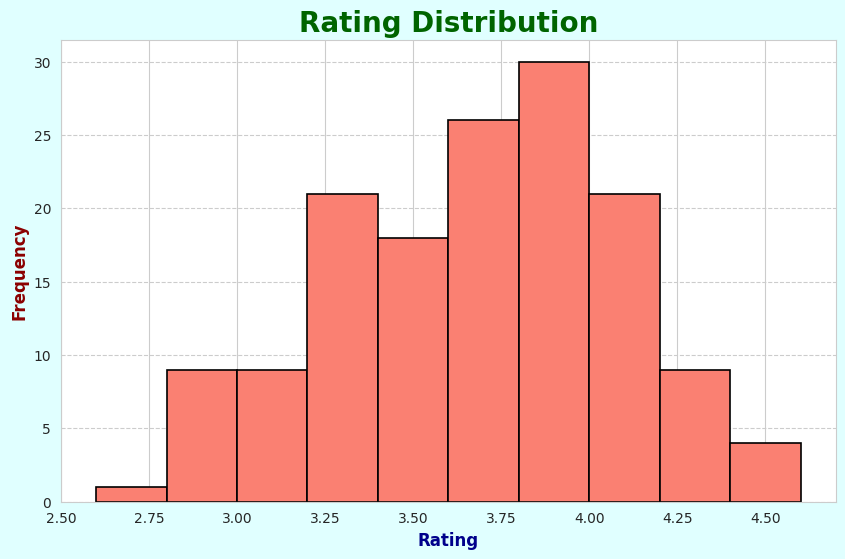

In [56]:
plt.figure(figsize=(10, 6), facecolor="lightcyan")
plt.hist(dataframe["rate"], bins=10, linewidth=1.2, color="salmon", edgecolor="black")
plt.title("Rating Distribution", size=20, color='darkgreen', fontweight='bold')
plt.xlabel("Rating", fontsize=12, fontweight="bold", color="darkblue")
plt.ylabel("Frequency", fontsize=12, fontweight="bold", color="darkred")
plt.grid(axis="y", linestyle="--")
plt.show()

Cell 7: Step 4 - Average Spending Amount by Couples

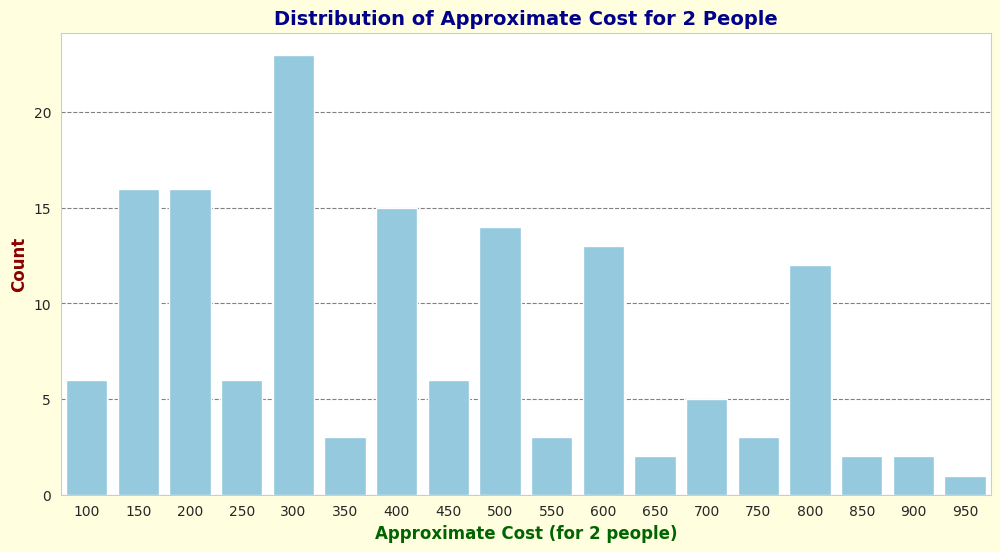

In [57]:
plt.figure(figsize=(12, 6), facecolor="lightyellow")
sns.set_style("whitegrid")
couple_data = dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data, color="skyblue")
plt.title("Distribution of Approximate Cost for 2 People", fontsize=14, fontweight="bold", color="darkblue")
plt.xlabel("Approximate Cost (for 2 people)", fontsize=12, fontweight="bold", color="darkgreen")
plt.ylabel("Count", fontsize=12, fontweight="bold", color="darkred")
plt.grid(axis="y", linestyle="--", color="gray")
plt.show()

Cell 8: Step 5 - Which Mode Receives Maximum Rating

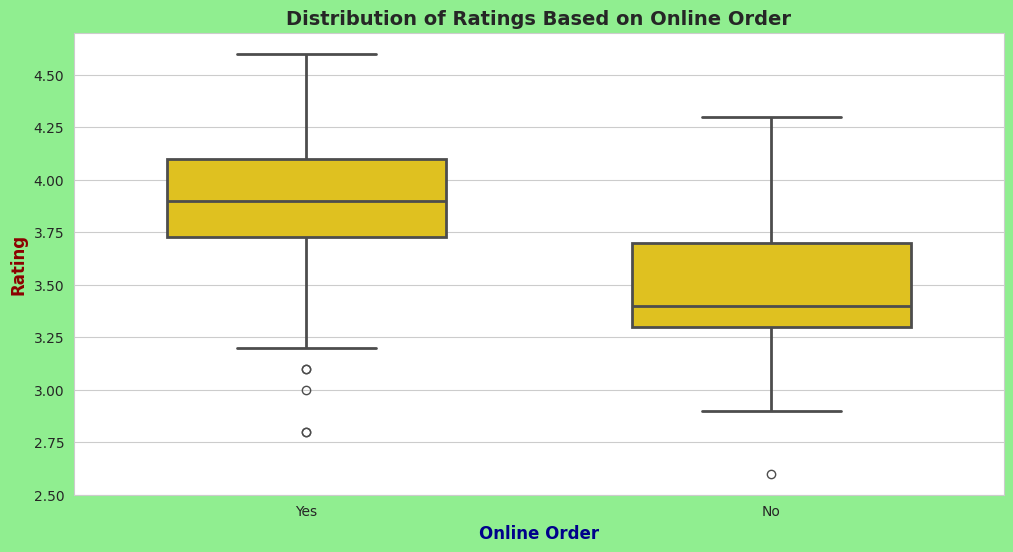

In [58]:
plt.figure(figsize=(12, 6), facecolor="lightgreen")
sns.boxplot(x='online_order', y='rate', data=dataframe, color="gold", linewidth=2, width=0.6)
plt.title("Distribution of Ratings Based on Online Order", fontweight="bold", fontsize=14)
plt.xlabel("Online Order", fontsize=12, fontweight="bold", color="darkblue")
plt.ylabel("Rating", fontsize=12, fontweight="bold", color="darkred")
plt.show()

Cell 9: Step 6 - Which Type of Restaurant Received More Offline Orders

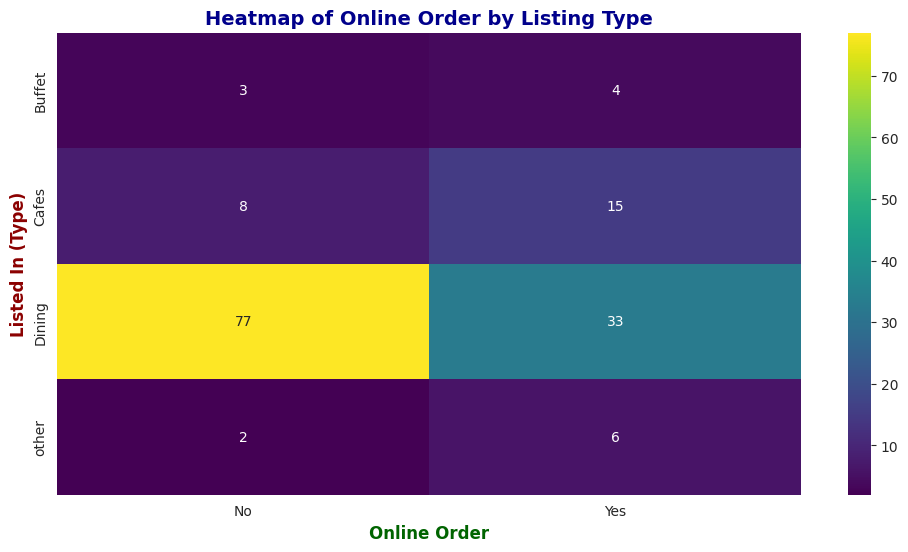

In [59]:
plt.figure(figsize=(12, 6))
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="viridis", fmt='d')
plt.title("Heatmap of Online Order by Listing Type", fontsize=14, fontweight="bold", color="darkblue")
plt.xlabel("Online Order", fontsize=12, fontweight="bold", color="darkgreen")
plt.ylabel("Listed In (Type)", fontsize=12, fontweight="bold", color="darkred")
plt.show()